## Importing and prepping data

In [1]:
import pandas as pd
import numpy as np
import diff_classifier.aws as aws
import diff_classifier.pca as pca

In [2]:
features = []
remote_folder = '09_26_18_tissue_study'
bucket = 'hpontes.data'

vids = 5
types = ['10K', '5K', '1K', 'COOH']
slices = [1, 2, 3, 4, 5, 6]
counter = 0
for typ in types:
    for slic in slices:
        for num in range(1, vids+1):
            try:
                #to_track.append('100x_0_4_1_2_gel_{}_bulk_vid_{}'.format(vis, num))
                #to_track.append('{}_P{}_S{}_XY{}'.format(typ, pup, slic, '%02d' % num))
                filename = 'features_{}_tissue_S{}_XY{}.csv'.format(typ, slic, num)
                aws.download_s3('{}/{}'.format(remote_folder, filename), filename, bucket_name=bucket)
                fstats = pd.read_csv(filename, encoding = "ISO-8859-1", index_col='Unnamed: 0')
                fstats['Particle Type'] = pd.Series(fstats.shape[0]*[typ], index=fstats.index)
                fstats['Video Number'] = pd.Series(fstats.shape[0]*[num], index=fstats.index)
                fstats['Slices'] = pd.Series(fstats.shape[0]*[str(slic)], index=fstats.index)
                #print(num)
                print(filename)
                counter = counter + 1
                if counter == 1:
                    fstats_tot = fstats
                else:
                    fstats_tot = fstats_tot.append(fstats, ignore_index=True)
            except:
                print('skipped filename: {}'.format(filename))

features_10K_tissue_S1_XY1.csv
features_10K_tissue_S1_XY2.csv
features_10K_tissue_S1_XY3.csv
features_10K_tissue_S1_XY4.csv
features_10K_tissue_S1_XY5.csv
features_10K_tissue_S2_XY1.csv
features_10K_tissue_S2_XY2.csv
features_10K_tissue_S2_XY3.csv
features_10K_tissue_S2_XY4.csv
features_10K_tissue_S2_XY5.csv
features_10K_tissue_S3_XY1.csv
features_10K_tissue_S3_XY2.csv
features_10K_tissue_S3_XY3.csv
features_10K_tissue_S3_XY4.csv
features_10K_tissue_S3_XY5.csv
features_10K_tissue_S4_XY1.csv
features_10K_tissue_S4_XY2.csv
features_10K_tissue_S4_XY3.csv
features_10K_tissue_S4_XY4.csv
features_10K_tissue_S4_XY5.csv
features_10K_tissue_S5_XY1.csv
features_10K_tissue_S5_XY2.csv
features_10K_tissue_S5_XY3.csv
features_10K_tissue_S5_XY4.csv
features_10K_tissue_S5_XY5.csv
features_10K_tissue_S6_XY1.csv
features_10K_tissue_S6_XY2.csv
features_10K_tissue_S6_XY3.csv
features_10K_tissue_S6_XY4.csv
features_10K_tissue_S6_XY5.csv
features_5K_tissue_S1_XY1.csv
features_5K_tissue_S1_XY2.csv
features_5

In [3]:
nonnum = ['Particle Type', 'Video Number', 'Slices', 'Track_ID', 'Mean Mean_Intensity', 'Std Mean_Intensity', 'X', 'Y', 'Quality',
          'Mean_Intensity', 'SN_Ratio', 'Mean X', 'Std X', 'Mean Y', 'Std Y', 'Mean Quality', 'Std Quality', 'Mean SN_Ratio',
          'Std SN_Ratio', 'binx', 'biny', 'bins']

## Train-Test Split

In [6]:
bins = list(range(0, 2048+1, 256))
fstats_tot['binx'] = pd.cut(fstats_tot.X, bins, labels=[0, 1, 2, 3, 4, 5, 6, 7])
fstats_tot['biny'] = pd.cut(fstats_tot.Y, bins, labels=[0, 1, 2, 3, 4, 5, 6, 7])
fstats_tot['bins'] = 8*fstats_tot['binx'] + fstats_tot['biny']
fstats_tot = fstats_tot[np.isfinite(fstats_tot.bins)]
fstats_tot.bins = fstats_tot.bins.astype(int)

In [7]:
# cols = fstats_tot.columns.tolist()
# cols = cols[-3:] + cols[:-3]
# pcadataset.final = pcadataset.final[cols]

def checkerboard(size):
    rows = int(size/2)
    checks = list(range(0, size*size, size+1))
    
    for i in range(1, rows):
        ssize = size - 2*i
        for j in range(0, ssize):
            checks.append(2*i + (size+1)*j)

    for i in range(1, rows):
        ssize = size - 2*i
        for j in range(0, ssize):
            checks.append(size*size - 1 - (2*i + (size+1)*j))
    checks.sort()
    return checks

In [18]:
featofvar = 'Particle Type'
#ncomp = 15
ptrain = ['2', '3', '4', '5', '6']
ptest = ['1']

# X_train = pcadataset.final[pcadataset.final.bins.isin(checkerboard(8))].values[:, -ncomp:]
# X_test = pcadataset.final[~pcadataset.final.bins.isin(checkerboard(8))].values[:, -ncomp:]
# y_train = pcadataset.final[pcadataset.final.bins.isin(checkerboard(8))][featofvar].values
# y_test = pcadataset.final[~pcadataset.final.bins.isin(checkerboard(8))][featofvar].values

#f_train = fstats_tot[fstats_tot.bins.isin(checkerboard(8))].reset_index()
#f_test = fstats_tot[~fstats_tot.bins.isin(checkerboard(8))].reset_index()
f_train = fstats_tot[fstats_tot.Slices.isin(ptrain)].reset_index()
f_test = fstats_tot[fstats_tot.Slices.isin(ptest)].reset_index()

# for run in range(1):
#     clf = MLPClassifier(hidden_layer_sizes=(900, ), solver='sgd', verbose=True, max_iter=500, tol=0.00001,
#                         alpha=0.001, batch_size=50, learning_rate_init=0.005, learning_rate='adaptive',
#                         early_stopping=True, validation_fraction=0.1)

#     clf.fit(X_train, y_train)
    
#     print('Training Results')
#     y_true1, y_pred1 = y_train, clf.predict(X_train)
#     print(classification_report(y_true1, y_pred1, digits=4))
    
#     print('Test Results')
#     print()
#     y_true, y_pred = y_test, clf.predict(X_test)
#     print(classification_report(y_true, y_pred, digits=4))

In [16]:
f_test.shape

(91082, 74)

## PCA analysis

The pca.pca_analysis function provides a completely contained PCA analysis of the input trajectory features dataset. It includes options to impute NaN values (fill in with average values or drop them), and to scale features. Read the docstring for more information. 

In [19]:
ncomp = 12
pca_train = pca.pca_analysis(f_train, dropcols=nonnum, n_components=ncomp)

Cumulative explained variance:
0 component: 0.32376379412612355
1 component: 0.4617518840715116
2 component: 0.5368239247944422
3 component: 0.602342259581722
4 component: 0.6443267824697185
5 component: 0.6806575704908179
6 component: 0.7090738521399569
7 component: 0.7330501342970771
8 component: 0.7555803366729774
9 component: 0.7774665025520325
10 component: 0.7963783107115153
11 component: 0.815132563251294


In [18]:
kmostat = pca.kmo(pca_train.scaled)

0.921822359051


In [19]:
pca_train.final.head()

,index,Track_ID,alpha,D_fit,kurtosis,asymmetry1,asymmetry2,asymmetry3,AR,elongation,...,2,3,4,5,6,7,8,9,10,11
0,0,0.0,0.216767,5.093203,1.699153,0.903056,0.159647,0.304582,1.273853,0.214980,...,-2.197170,2.383707,0.279898,-0.009328,0.275076,-0.765565,0.164274,1.230637,-0.558305,0.416429
1,1,1.0,0.570542,0.344262,2.743081,0.995154,0.034848,0.570787,1.467932,0.318770,...,-2.666774,2.475804,-0.740145,-1.094796,-0.307241,-1.216627,0.272269,0.175249,0.710406,-0.345028
2,2,2.0,1.308503,0.012360,6.800472,0.549246,0.385605,0.103482,1.871101,0.465555,...,-1.473234,2.792158,-1.507516,0.234426,0.438063,-1.248972,0.483194,0.536058,1.102490,0.936374
3,3,3.0,0.032338,16.219306,1.352962,0.994927,0.035657,0.568299,3.567554,0.719696,...,-1.628287,1.295598,2.548013,-0.602113,-2.020393,-1.255928,4.003223,-0.249010,-0.359059,0.662609
4,4,4.0,0.530168,11.809362,3.739724,0.193636,0.623578,0.027244,1.367018,0.268481,...,-8.119950,5.191964,-0.572130,2.322790,1.888009,4.353171,2.046003,-0.009259,1.450975,-1.700896


In [20]:
pca_test = pca.pca_analysis(f_test, dropcols=nonnum, n_components=ncomp, existing_model=True, model_file=pca_train)

## Visualization

Users can then compare average principle component values between subgroups of the data. In this case, all particles were taken from the same sample, so there are no experimental subgroups. I chose to compare short trajectories to long trajectories, as I would expect differences between the two groups.

In [22]:
import numpy as np
featofvar = 'Particle Type'
dicti = {}
#test = np.exp(np.nanmean(np.log(pcadataset.final[pcadataset.final['Particle Size']==200].as_matrix()), axis=0))[-6:]
#test1 = np.exp(np.nanmean(np.log(pcadataset.final[pcadataset.final['Particle Size']==500].as_matrix()), axis=0))[-6:]
dicti[0] = np.nanmean(pca_train.final[pca_train.final[featofvar]=='COOH'].values[:, -ncomp:], axis=0)
dicti[1] = np.nanmean(pca_train.final[pca_train.final[featofvar]=='1K'].values[:, -ncomp:], axis=0)
dicti[2] = np.nanmean(pca_train.final[pca_train.final[featofvar]=='5K'].values[:, -ncomp:], axis=0)
dicti[3] = np.nanmean(pca_train.final[pca_train.final[featofvar]=='10K'].values[:, -ncomp:], axis=0)

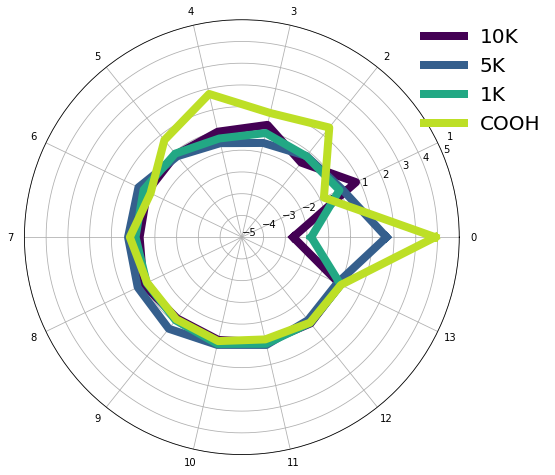

In [5]:
pca.plot_pca(dicti, savefig=True, labels=['10K', '5K', '1K', 'COOH'], rticks=np.linspace(-5, 5, 11), filename='pics/tissue_MW_pcaavg.png')

The variable pcadataset.prcomps shows the user the major contributions to each of the new principle components. When observing the graph above, users can see that there are some differences between short trajectories and long trajectories in component 0 (asymmetry1 being the major contributor) and component 1 (elongation being the major contributor).

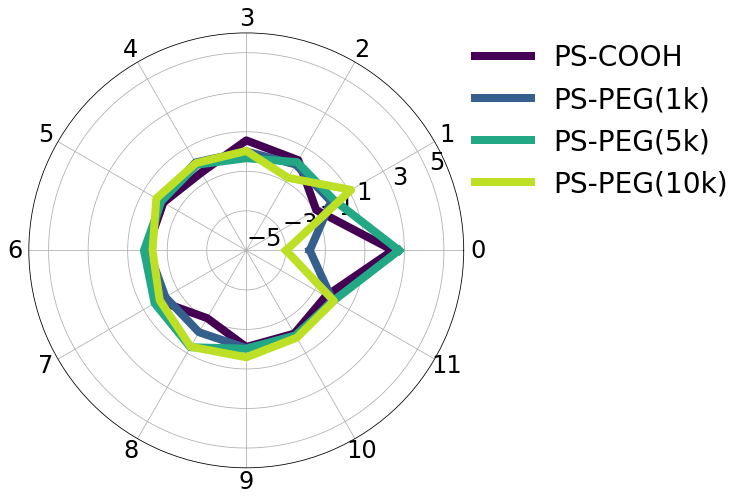

In [23]:
labels = ['COOH', '1K', '5K', '10K']
labels2 = ['PS-COOH', 'PS-PEG(1k)', 'PS-PEG(5k)', 'PS-PEG(10k)']
pca.plot_pca(dicti, savefig=True, labels=labels2, rticks=np.linspace(-5, 5, 6), dpi=1200, labelsize=24,
             filename='pics/tissue_pcaavg.png')

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import cm

def feature_violin(df, label='label', lvals=['yes', 'no'], labels=['yes', 'no'], fsubset=3, **kwargs):
    """Creates violinplot of input feature dataset

    Designed to plot PCA components from pca_analysis.

    Parameters
    ----------
    df : pandas.core.frames.DataFrame
        Must contain a group name column, and numerical feature columns.
    label : string or int
        Name of group column.
    lvals : list of string or int
        All values that group column can take
    fsubset : int or list of int
        Features to be plotted. If integer, will plot range(fsubset).
        If list, will only plot features contained in fsubset.
    **kwargs : variable
        figsize : tuple of int or float
            Dimensions of output figure
        yrange : list of int or float
            Range of y axis
        xlabel : string
            Label of x axis
        labelsize : int or float
            Font size of x label
        ticksize : int or float
            Font size of y tick labels
        fname : None or string
            Name of output file
        legendfontsize : int or float
            Font size of legend
        legendloc : int
            Location of legend in plot e.g. 1, 2, 3, 4

    """

    defaults = {'figsize': (12, 5), 'yrange': [-20, 20], 'xlabel': 'Feature',
                'labelsize': 20, 'ticksize': 16, 'fname': None,
                'legendfontsize': 12, 'legendloc': 1}

    for defkey in defaults.keys():
        if defkey not in kwargs.keys():
            kwargs[defkey] = defaults[defkey]

    # Restacking input data
    groupsize = []
    featcol = []
    valcol = []
    feattype = []

    if isinstance(fsubset, int):
        frange = range(fsubset)
    else:
        frange = fsubset

    for feat in frange:
        groupsize.extend(df[label].values)
        featcol.extend([feat]*df[label].values.shape[0])
        valcol.extend(df[feat].values)

    to_violind = {'label': groupsize, 'Feature': featcol,
                  'Feature Value': valcol}
    to_violin = pd.DataFrame(data=to_violind)

    # Plotting function
    fig, ax = plt.subplots(figsize=kwargs['figsize'])
    sns.violinplot(x="Feature", y="Feature Value", hue="label", data=to_violin,
                   palette=cm.viridis(np.linspace(0, 0.9, 4)), hue_order=lvals,
                   figsize=kwargs['figsize'], linewidth=0)

    # kwargs
    ax.tick_params(axis='both', which='major', labelsize=kwargs['ticksize'])
    plt.xlabel('Feature', fontsize=kwargs['labelsize'])
    plt.ylabel('Normalized\nFeature Space', fontsize=kwargs['labelsize'])
    plt.ylim(kwargs['yrange'])
    plt.setp(ax.collections, alpha=.75)
    L=ax.legend(loc='upper right', prop={'size': 18})
    for item, label in zip(L.get_texts(), labels):
        item.set_text(label)
    #ax.legend(prop={'size': 18})
    
    if kwargs['fname'] is None:
        plt.show()
    else:
        plt.savefig(kwargs['fname'], dpi=300, pad_inches=0.22)

    return to_violin

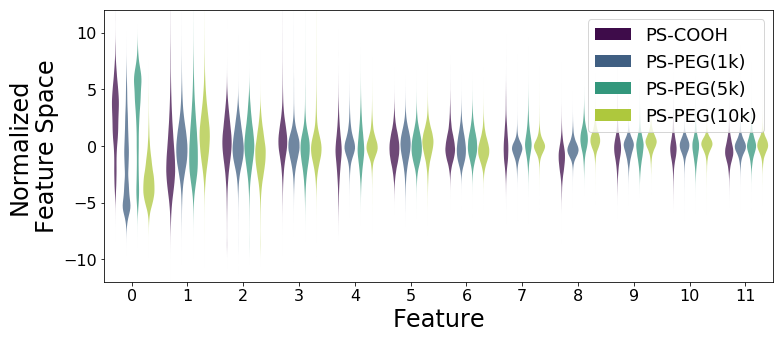

In [26]:
feats = feature_violin(pca_train.final, label='Particle Type', lvals=labels, labels=labels2, fsubset=ncomp, yrange=[-12, 12],
                       legendfontsize=21, labelsize=24, fname='./pics/tissue_pcadist.png')

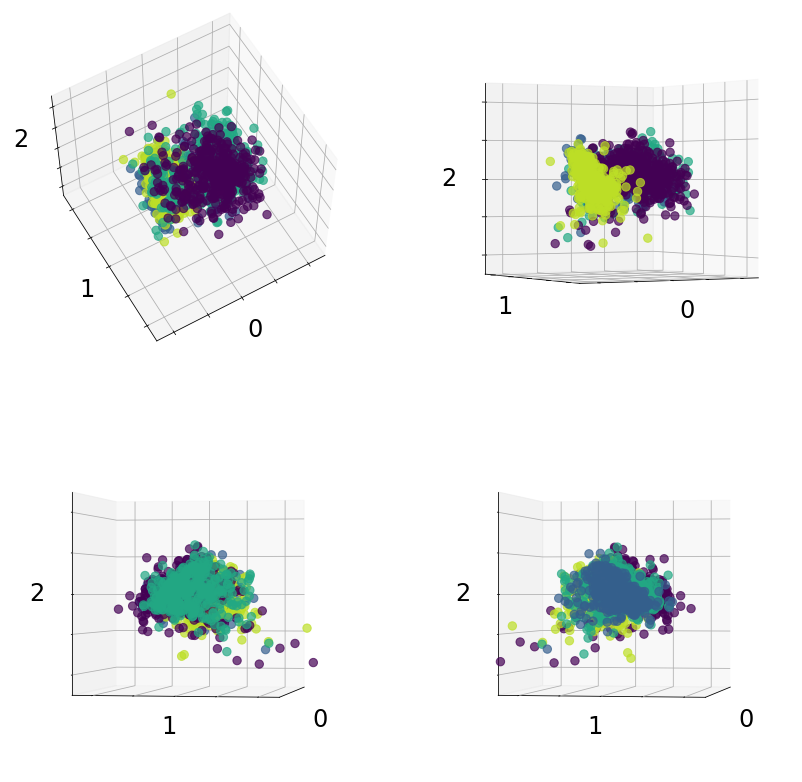

In [27]:
fstats1 = pca.feature_plot_3D(pca_train.final, label='Particle Type', lvals=labels, randcount=400, ylim=[-12, 12],
                              xlim=[-12, 12], zlim=[-12, 12], legendfontsize=24, labelfontsize=24, dpi=1600,
                              ticksize=20,
                              fname='./pics/tissue_3feats.png')

## Neural Network

In [12]:
from sklearn.model_selection import GridSearchCV, cross_val_score, KFold, train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report

In [29]:
##6

X_train = pca_train.final.values[:, -ncomp:]
X_test = pca_test.final.values[:, -ncomp:]
y_train = pca_train.final[featofvar].values
y_test = pca_test.final[featofvar].values

for run in range(1):
    clf = MLPClassifier(hidden_layer_sizes=(900, ), solver='sgd', verbose=True, max_iter=500, tol=0.00001,
                        alpha=0.001, batch_size=50, learning_rate_init=0.005, learning_rate='adaptive',
                        early_stopping=True, validation_fraction=0.1)

    clf.fit(X_train, y_train)

    print('Training Results')
    y_true1, y_pred1 = y_train, clf.predict(X_train)
    print(classification_report(y_true1, y_pred1, digits=4))

    print('Test Results')
    print()
    y_true, y_pred = y_test, clf.predict(X_test)
    print(classification_report(y_true, y_pred, digits=4))

Iteration 1, loss = 0.47457151
Validation score: 0.839521
Iteration 2, loss = 0.41130087
Validation score: 0.847015
Iteration 3, loss = 0.39147561
Validation score: 0.851178
Iteration 4, loss = 0.37819706
Validation score: 0.855689
Iteration 5, loss = 0.36724280
Validation score: 0.857031
Iteration 6, loss = 0.35974992
Validation score: 0.857077
Iteration 7, loss = 0.35289984
Validation score: 0.865612
Iteration 8, loss = 0.34665202
Validation score: 0.867139
Iteration 9, loss = 0.34104880
Validation score: 0.869197
Iteration 10, loss = 0.33721572
Validation score: 0.867347
Iteration 11, loss = 0.33238988
Validation score: 0.862073
Iteration 12, loss = 0.32911611
Validation score: 0.869197
Validation score did not improve more than tol=0.000010 for two consecutive epochs. Setting learning rate to 0.001000
Iteration 13, loss = 0.29526069
Validation score: 0.883446
Iteration 14, loss = 0.29153399
Validation score: 0.886106
Iteration 15, loss = 0.28951006
Validation score: 0.886614
Iterat

In [33]:
##5

X_train = pca_train.final.values[:, -ncomp:]
X_test = pca_test.final.values[:, -ncomp:]
y_train = pca_train.final[featofvar].values
y_test = pca_test.final[featofvar].values

for run in range(1):
    clf = MLPClassifier(hidden_layer_sizes=(900, ), solver='sgd', verbose=True, max_iter=500, tol=0.00001,
                        alpha=0.001, batch_size=50, learning_rate_init=0.005, learning_rate='adaptive',
                        early_stopping=True, validation_fraction=0.1)

    clf.fit(X_train, y_train)

    print('Training Results')
    y_true1, y_pred1 = y_train, clf.predict(X_train)
    print(classification_report(y_true1, y_pred1, digits=4))

    print('Test Results')
    print()
    y_true, y_pred = y_test, clf.predict(X_test)
    print(classification_report(y_true, y_pred, digits=4))

Iteration 1, loss = 0.53311366
Validation score: 0.816122
Iteration 2, loss = 0.46519547
Validation score: 0.819689
Iteration 3, loss = 0.44159645
Validation score: 0.834911
Iteration 4, loss = 0.42585431
Validation score: 0.836525
Iteration 5, loss = 0.41406217
Validation score: 0.841620
Iteration 6, loss = 0.40377427
Validation score: 0.843276
Iteration 7, loss = 0.39621806
Validation score: 0.845718
Iteration 8, loss = 0.38963655
Validation score: 0.848181
Iteration 9, loss = 0.38342679
Validation score: 0.847862
Iteration 10, loss = 0.37822941
Validation score: 0.849667
Iteration 11, loss = 0.37302292
Validation score: 0.854189
Iteration 12, loss = 0.36980277
Validation score: 0.851301
Iteration 13, loss = 0.36559303
Validation score: 0.856630
Iteration 14, loss = 0.36044789
Validation score: 0.861768
Iteration 15, loss = 0.35755166
Validation score: 0.862978
Iteration 16, loss = 0.35443726
Validation score: 0.863382
Iteration 17, loss = 0.35173147
Validation score: 0.858583
Iterat

In [37]:
##4

X_train = pca_train.final.values[:, -ncomp:]
X_test = pca_test.final.values[:, -ncomp:]
y_train = pca_train.final[featofvar].values
y_test = pca_test.final[featofvar].values

for run in range(1):
    clf = MLPClassifier(hidden_layer_sizes=(900, ), solver='sgd', verbose=True, max_iter=500, tol=0.00001,
                        alpha=0.001, batch_size=50, learning_rate_init=0.005, learning_rate='adaptive',
                        early_stopping=True, validation_fraction=0.1)

    clf.fit(X_train, y_train)

    print('Training Results')
    y_true1, y_pred1 = y_train, clf.predict(X_train)
    print(classification_report(y_true1, y_pred1, digits=4))

    print('Test Results')
    print()
    y_true, y_pred = y_test, clf.predict(X_test)
    print(classification_report(y_true, y_pred, digits=4))

Iteration 1, loss = 0.56863638
Validation score: 0.789828
Iteration 2, loss = 0.51295536
Validation score: 0.800936
Iteration 3, loss = 0.49612345
Validation score: 0.805672
Iteration 4, loss = 0.48395318
Validation score: 0.807956
Iteration 5, loss = 0.47449872
Validation score: 0.811029
Iteration 6, loss = 0.46625997
Validation score: 0.815878
Iteration 7, loss = 0.45934860
Validation score: 0.814440
Iteration 8, loss = 0.45300150
Validation score: 0.818330
Iteration 9, loss = 0.44713850
Validation score: 0.820332
Iteration 10, loss = 0.44131066
Validation score: 0.823856
Iteration 11, loss = 0.43789275
Validation score: 0.832765
Iteration 12, loss = 0.43333202
Validation score: 0.833667
Iteration 13, loss = 0.42888050
Validation score: 0.831242
Iteration 14, loss = 0.42562388
Validation score: 0.825097
Iteration 15, loss = 0.42176702
Validation score: 0.832342
Validation score did not improve more than tol=0.000010 for two consecutive epochs. Setting learning rate to 0.001000
Iterat

In [13]:
## 3

X_train = pca_train.final.values[:, -ncomp:]
X_test = pca_test.final.values[:, -ncomp:]
y_train = pca_train.final[featofvar].values
y_test = pca_test.final[featofvar].values

for run in range(1):
    clf = MLPClassifier(hidden_layer_sizes=(900, ), solver='sgd', verbose=True, max_iter=500, tol=0.00001,
                        alpha=0.001, batch_size=50, learning_rate_init=0.005, learning_rate='adaptive',
                        early_stopping=True, validation_fraction=0.1)

    clf.fit(X_train, y_train)

    print('Training Results')
    y_true1, y_pred1 = y_train, clf.predict(X_train)
    print(classification_report(y_true1, y_pred1, digits=4))

    print('Test Results')
    print()
    y_true, y_pred = y_test, clf.predict(X_test)
    print(classification_report(y_true, y_pred, digits=4))

Iteration 1, loss = 0.51295349
Validation score: 0.834124
Iteration 2, loss = 0.44547518
Validation score: 0.840192
Iteration 3, loss = 0.42354507
Validation score: 0.846743
Iteration 4, loss = 0.40880592
Validation score: 0.848491
Iteration 5, loss = 0.39814888
Validation score: 0.841599
Iteration 6, loss = 0.39006377
Validation score: 0.857393
Iteration 7, loss = 0.38290534
Validation score: 0.860206
Iteration 8, loss = 0.37671102
Validation score: 0.861030
Iteration 9, loss = 0.37122953
Validation score: 0.854700
Iteration 10, loss = 0.36658005
Validation score: 0.859824
Iteration 11, loss = 0.36273244
Validation score: 0.855403
Validation score did not improve more than tol=0.000010 for two consecutive epochs. Setting learning rate to 0.001000
Iteration 12, loss = 0.32450250
Validation score: 0.875658
Iteration 13, loss = 0.32012393
Validation score: 0.878672
Iteration 14, loss = 0.31774104
Validation score: 0.878974
Iteration 15, loss = 0.31572718
Validation score: 0.879657
Iterat

In [17]:
## 2

X_train = pca_train.final.values[:, -ncomp:]
X_test = pca_test.final.values[:, -ncomp:]
y_train = pca_train.final[featofvar].values
y_test = pca_test.final[featofvar].values

for run in range(1):
    clf = MLPClassifier(hidden_layer_sizes=(900, ), solver='sgd', verbose=True, max_iter=500, tol=0.00001,
                        alpha=0.001, batch_size=50, learning_rate_init=0.005, learning_rate='adaptive',
                        early_stopping=True, validation_fraction=0.1)

    clf.fit(X_train, y_train)

    print('Training Results')
    y_true1, y_pred1 = y_train, clf.predict(X_train)
    print(classification_report(y_true1, y_pred1, digits=4))

    print('Test Results')
    print()
    y_true, y_pred = y_test, clf.predict(X_test)
    print(classification_report(y_true, y_pred, digits=4))

Iteration 1, loss = 0.52478202
Validation score: 0.821150
Iteration 2, loss = 0.45728708
Validation score: 0.837287
Iteration 3, loss = 0.43461053
Validation score: 0.821694
Iteration 4, loss = 0.42031911
Validation score: 0.846522
Iteration 5, loss = 0.40930990
Validation score: 0.845335
Iteration 6, loss = 0.40085948
Validation score: 0.848011
Iteration 7, loss = 0.39430638
Validation score: 0.845496
Iteration 8, loss = 0.38803615
Validation score: 0.852820
Iteration 9, loss = 0.38303879
Validation score: 0.842357
Iteration 10, loss = 0.37819739
Validation score: 0.859258
Iteration 11, loss = 0.37400834
Validation score: 0.855637
Iteration 12, loss = 0.36904108
Validation score: 0.856462
Iteration 13, loss = 0.36622307
Validation score: 0.860586
Iteration 14, loss = 0.36331647
Validation score: 0.858796
Iteration 15, loss = 0.35997005
Validation score: 0.865958
Iteration 16, loss = 0.35736280
Validation score: 0.855596
Iteration 17, loss = 0.35465314
Validation score: 0.864288
Iterat

In [21]:
## 1

X_train = pca_train.final.values[:, -ncomp:]
X_test = pca_test.final.values[:, -ncomp:]
y_train = pca_train.final[featofvar].values
y_test = pca_test.final[featofvar].values

for run in range(1):
    clf = MLPClassifier(hidden_layer_sizes=(900, ), solver='sgd', verbose=True, max_iter=500, tol=0.00001,
                        alpha=0.001, batch_size=50, learning_rate_init=0.005, learning_rate='adaptive',
                        early_stopping=True, validation_fraction=0.1)

    clf.fit(X_train, y_train)

    print('Training Results')
    y_true1, y_pred1 = y_train, clf.predict(X_train)
    print(classification_report(y_true1, y_pred1, digits=4))

    print('Test Results')
    print()
    y_true, y_pred = y_test, clf.predict(X_test)
    print(classification_report(y_true, y_pred, digits=4))

Iteration 1, loss = 0.44864228
Validation score: 0.849728
Iteration 2, loss = 0.38622635
Validation score: 0.853296
Iteration 3, loss = 0.36835162
Validation score: 0.860899
Iteration 4, loss = 0.35667944
Validation score: 0.865867
Iteration 5, loss = 0.34828423
Validation score: 0.865044
Iteration 6, loss = 0.34090106
Validation score: 0.870753
Iteration 7, loss = 0.33542568
Validation score: 0.869380
Iteration 8, loss = 0.33073129
Validation score: 0.869902
Iteration 9, loss = 0.32615289
Validation score: 0.874732
Iteration 10, loss = 0.32199019
Validation score: 0.878877
Iteration 11, loss = 0.31857135
Validation score: 0.874321
Iteration 12, loss = 0.31534759
Validation score: 0.880359
Iteration 13, loss = 0.31243042
Validation score: 0.879700
Iteration 14, loss = 0.30972874
Validation score: 0.880386
Iteration 15, loss = 0.30798667
Validation score: 0.879810
Iteration 16, loss = 0.30552798
Validation score: 0.881649
Iteration 17, loss = 0.30284705
Validation score: 0.884641
Iterat

In [42]:
X_train = pca_train.final[pca_train.final.Slices.isin(['1', '2', '3', '4', '5'])]
test = pca_test.final[pca_test.final.Slices.isin(['1', '2', '3', '4', '5'])]

In [47]:
X_train.shape

(216902, 86)

In [46]:
np.concatenate((X_train, test), axis=0).shape

(432328, 86)

In [48]:
X_train = np.concatenate((pca_train.final[pca_train.final.Slices.isin(['1', '2', '3', '4', '5'])].values[:, -ncomp:], pca_test.final[pca_test.final.Slices.isin(['1', '2', '3', '4', '5'])].values[:, -ncomp:]))
X_test = np.concatenate((pca_test.final[pca_test.final.Slices.isin(['6'])].values[:, -ncomp:], pca_train.final[pca_train.final.Slices.isin(['6'])].values[:, -ncomp:]))
y_train = np.concatenate((pca_train.final[pca_train.final.Slices.isin(['1', '2', '3', '4', '5'])][featofvar].values, pca_test.final[pca_test.final.Slices.isin(['1', '2', '3', '4', '5'])][featofvar].values))
y_test = np.concatenate((pca_test.final[pca_test.final.Slices.isin(['6'])][featofvar].values, pca_train.final[pca_train.final.Slices.isin(['6'])][featofvar].values))

for run in range(1):
    clf = MLPClassifier(hidden_layer_sizes=(900, ), solver='sgd', verbose=True, max_iter=500, tol=0.00001,
                        alpha=0.001, batch_size=50, learning_rate_init=0.005, learning_rate='adaptive',
                        early_stopping=True, validation_fraction=0.1)

    clf.fit(X_train, y_train)

    print('Training Results')
    y_true1, y_pred1 = y_train, clf.predict(X_train)
    print(classification_report(y_true1, y_pred1, digits=4))

    print('Test Results')
    print()
    y_true, y_pred = y_test, clf.predict(X_test)
    print(classification_report(y_true, y_pred, digits=4))

Iteration 1, loss = 0.49082143
Validation score: 0.835589
Iteration 2, loss = 0.42499320
Validation score: 0.843175
Iteration 3, loss = 0.40571628
Validation score: 0.847131
Iteration 4, loss = 0.39202140
Validation score: 0.852358
Iteration 5, loss = 0.38192322
Validation score: 0.854347
Iteration 6, loss = 0.37300458
Validation score: 0.853908
Iteration 7, loss = 0.36636843
Validation score: 0.857586
Iteration 8, loss = 0.36012858
Validation score: 0.862859
Iteration 9, loss = 0.35337988
Validation score: 0.856776
Iteration 10, loss = 0.34812725
Validation score: 0.862906
Iteration 11, loss = 0.34317756
Validation score: 0.868133
Iteration 12, loss = 0.33962445
Validation score: 0.872343
Iteration 13, loss = 0.33534055
Validation score: 0.870631
Iteration 14, loss = 0.33232468
Validation score: 0.867277
Iteration 15, loss = 0.32824031
Validation score: 0.874170
Iteration 16, loss = 0.32503906
Validation score: 0.877432
Iteration 17, loss = 0.32257719
Validation score: 0.881572
Iterat

In [ ]:
X_train = np.concatenate((pca_train.final[pca_train.final.Slices.isin(['1', '2', '3', '4', '6'])].values[:, -ncomp:], pca_test.final[pca_test.final.Slices.isin(['1', '2', '3', '4', '6'])].values[:, -ncomp:]))
X_test = np.concatenate((pca_test.final[pca_test.final.Slices.isin(['5'])].values[:, -ncomp:], pca_train.final[pca_train.final.Slices.isin(['5'])].values[:, -ncomp:]))
y_train = np.concatenate((pca_train.final[pca_train.final.Slices.isin(['1', '2', '3', '4', '6'])][featofvar].values, pca_test.final[pca_test.final.Slices.isin(['1', '2', '3', '4', '6'])][featofvar].values))
y_test = np.concatenate((pca_test.final[pca_test.final.Slices.isin(['5'])][featofvar].values, pca_train.final[pca_train.final.Slices.isin(['5'])][featofvar].values))

for run in range(1):
    clf = MLPClassifier(hidden_layer_sizes=(900, ), solver='sgd', verbose=True, max_iter=500, tol=0.00001,
                        alpha=0.001, batch_size=50, learning_rate_init=0.005, learning_rate='adaptive',
                        early_stopping=True, validation_fraction=0.1)

    clf.fit(X_train, y_train)

    print('Training Results')
    y_true1, y_pred1 = y_train, clf.predict(X_train)
    print(classification_report(y_true1, y_pred1, digits=4))

    print('Test Results')
    print()
    y_true, y_pred = y_test, clf.predict(X_test)
    print(classification_report(y_true, y_pred, digits=4))

In [50]:
X_train = np.concatenate((pca_train.final[pca_train.final.Slices.isin(['1', '2', '3', '6', '5'])].values[:, -ncomp:], pca_test.final[pca_test.final.Slices.isin(['1', '2', '3', '6', '5'])].values[:, -ncomp:]))
X_test = np.concatenate((pca_test.final[pca_test.final.Slices.isin(['4'])].values[:, -ncomp:], pca_train.final[pca_train.final.Slices.isin(['4'])].values[:, -ncomp:]))
y_train = np.concatenate((pca_train.final[pca_train.final.Slices.isin(['1', '2', '3', '6', '5'])][featofvar].values, pca_test.final[pca_test.final.Slices.isin(['1', '2', '3', '6', '5'])][featofvar].values))
y_test = np.concatenate((pca_test.final[pca_test.final.Slices.isin(['4'])][featofvar].values, pca_train.final[pca_train.final.Slices.isin(['4'])][featofvar].values))

for run in range(1):
    clf = MLPClassifier(hidden_layer_sizes=(900, ), solver='sgd', verbose=True, max_iter=500, tol=0.00001,
                        alpha=0.001, batch_size=50, learning_rate_init=0.005, learning_rate='adaptive',
                        early_stopping=True, validation_fraction=0.1)

    clf.fit(X_train, y_train)

    print('Training Results')
    y_true1, y_pred1 = y_train, clf.predict(X_train)
    print(classification_report(y_true1, y_pred1, digits=4))

    print('Test Results')
    print()
    y_true, y_pred = y_test, clf.predict(X_test)
    print(classification_report(y_true, y_pred, digits=4))

Iteration 1, loss = 0.54071985
Validation score: 0.806631
Iteration 2, loss = 0.47068851
Validation score: 0.817513
Iteration 3, loss = 0.45117231
Validation score: 0.821009
Iteration 4, loss = 0.43771690
Validation score: 0.829692
Iteration 5, loss = 0.42797253
Validation score: 0.826788
Iteration 6, loss = 0.41958987
Validation score: 0.832370
Iteration 7, loss = 0.41253305
Validation score: 0.837642
Iteration 8, loss = 0.40636806
Validation score: 0.840518
Iteration 9, loss = 0.40096192
Validation score: 0.842576
Iteration 10, loss = 0.39572486
Validation score: 0.846100
Iteration 11, loss = 0.39180519
Validation score: 0.847256
Iteration 12, loss = 0.38712248
Validation score: 0.841504
Iteration 13, loss = 0.38333742
Validation score: 0.849426
Iteration 14, loss = 0.37934915
Validation score: 0.855629
Iteration 15, loss = 0.37674726
Validation score: 0.853007
Iteration 16, loss = 0.37350258
Validation score: 0.846889
Iteration 17, loss = 0.37054035
Validation score: 0.856643
Iterat

In [51]:
X_train = np.concatenate((pca_train.final[pca_train.final.Slices.isin(['1', '2', '6', '4', '5'])].values[:, -ncomp:], pca_test.final[pca_test.final.Slices.isin(['1', '2', '6', '4', '5'])].values[:, -ncomp:]))
X_test = np.concatenate((pca_test.final[pca_test.final.Slices.isin(['3'])].values[:, -ncomp:], pca_train.final[pca_train.final.Slices.isin(['3'])].values[:, -ncomp:]))
y_train = np.concatenate((pca_train.final[pca_train.final.Slices.isin(['1', '2', '6', '4', '5'])][featofvar].values, pca_test.final[pca_test.final.Slices.isin(['1', '2', '6', '4', '5'])][featofvar].values))
y_test = np.concatenate((pca_test.final[pca_test.final.Slices.isin(['3'])][featofvar].values, pca_train.final[pca_train.final.Slices.isin(['3'])][featofvar].values))

for run in range(1):
    clf = MLPClassifier(hidden_layer_sizes=(900, ), solver='sgd', verbose=True, max_iter=500, tol=0.00001,
                        alpha=0.001, batch_size=50, learning_rate_init=0.005, learning_rate='adaptive',
                        early_stopping=True, validation_fraction=0.1)

    clf.fit(X_train, y_train)

    print('Training Results')
    y_true1, y_pred1 = y_train, clf.predict(X_train)
    print(classification_report(y_true1, y_pred1, digits=4))

    print('Test Results')
    print()
    y_true, y_pred = y_test, clf.predict(X_test)
    print(classification_report(y_true, y_pred, digits=4))

Iteration 1, loss = 0.52218020
Validation score: 0.828236
Iteration 2, loss = 0.45368408
Validation score: 0.834505
Iteration 3, loss = 0.43121519
Validation score: 0.838544
Iteration 4, loss = 0.41617987
Validation score: 0.843729
Iteration 5, loss = 0.40488467
Validation score: 0.849054
Iteration 6, loss = 0.39593533
Validation score: 0.848591
Iteration 7, loss = 0.38819347
Validation score: 0.852932
Iteration 8, loss = 0.38181758
Validation score: 0.853213
Iteration 9, loss = 0.37636765
Validation score: 0.858237
Iteration 10, loss = 0.37110290
Validation score: 0.863983
Iteration 11, loss = 0.36717549
Validation score: 0.863019
Iteration 12, loss = 0.36263443
Validation score: 0.859543
Iteration 13, loss = 0.35907464
Validation score: 0.864004
Iteration 14, loss = 0.35653047
Validation score: 0.863381
Iteration 15, loss = 0.35375044
Validation score: 0.859201
Iteration 16, loss = 0.34901225
Validation score: 0.873508
Iteration 17, loss = 0.34694943
Validation score: 0.861874
Iterat

In [52]:
X_train = np.concatenate((pca_train.final[pca_train.final.Slices.isin(['1', '6', '3', '4', '5'])].values[:, -ncomp:], pca_test.final[pca_test.final.Slices.isin(['1', '6', '3', '4', '5'])].values[:, -ncomp:]))
X_test = np.concatenate((pca_test.final[pca_test.final.Slices.isin(['2'])].values[:, -ncomp:], pca_train.final[pca_train.final.Slices.isin(['2'])].values[:, -ncomp:]))
y_train = np.concatenate((pca_train.final[pca_train.final.Slices.isin(['1', '6', '3', '4', '5'])][featofvar].values, pca_test.final[pca_test.final.Slices.isin(['1', '6', '3', '4', '5'])][featofvar].values))
y_test = np.concatenate((pca_test.final[pca_test.final.Slices.isin(['2'])][featofvar].values, pca_train.final[pca_train.final.Slices.isin(['2'])][featofvar].values))

for run in range(1):
    clf = MLPClassifier(hidden_layer_sizes=(900, ), solver='sgd', verbose=True, max_iter=500, tol=0.00001,
                        alpha=0.001, batch_size=50, learning_rate_init=0.005, learning_rate='adaptive',
                        early_stopping=True, validation_fraction=0.1)

    clf.fit(X_train, y_train)

    print('Training Results')
    y_true1, y_pred1 = y_train, clf.predict(X_train)
    print(classification_report(y_true1, y_pred1, digits=4))

    print('Test Results')
    print()
    y_true, y_pred = y_test, clf.predict(X_test)
    print(classification_report(y_true, y_pred, digits=4))

Iteration 1, loss = 0.53397927
Validation score: 0.821171
Iteration 2, loss = 0.46606329
Validation score: 0.828374
Iteration 3, loss = 0.44334173
Validation score: 0.836422
Iteration 4, loss = 0.42919233
Validation score: 0.829681
Iteration 5, loss = 0.41751632
Validation score: 0.842116
Iteration 6, loss = 0.40926733
Validation score: 0.847890
Iteration 7, loss = 0.40144227
Validation score: 0.829259
Iteration 8, loss = 0.39522108
Validation score: 0.852860
Iteration 9, loss = 0.39003664
Validation score: 0.851331
Iteration 10, loss = 0.38523518
Validation score: 0.852760
Iteration 11, loss = 0.38068382
Validation score: 0.851492
Validation score did not improve more than tol=0.000010 for two consecutive epochs. Setting learning rate to 0.001000
Iteration 12, loss = 0.34199436
Validation score: 0.869500
Iteration 13, loss = 0.33718185
Validation score: 0.869520
Iteration 14, loss = 0.33462366
Validation score: 0.872316
Iteration 15, loss = 0.33260518
Validation score: 0.871894
Iterat

In [53]:
X_train = np.concatenate((pca_train.final[pca_train.final.Slices.isin(['6', '2', '3', '4', '5'])].values[:, -ncomp:], pca_test.final[pca_test.final.Slices.isin(['6', '2', '3', '4', '5'])].values[:, -ncomp:]))
X_test = np.concatenate((pca_test.final[pca_test.final.Slices.isin(['1'])].values[:, -ncomp:], pca_train.final[pca_train.final.Slices.isin(['1'])].values[:, -ncomp:]))
y_train = np.concatenate((pca_train.final[pca_train.final.Slices.isin(['6', '2', '3', '4', '5'])][featofvar].values, pca_test.final[pca_test.final.Slices.isin(['6', '2', '3', '4', '5'])][featofvar].values))
y_test = np.concatenate((pca_test.final[pca_test.final.Slices.isin(['1'])][featofvar].values, pca_train.final[pca_train.final.Slices.isin(['1'])][featofvar].values))

for run in range(1):
    clf = MLPClassifier(hidden_layer_sizes=(900, ), solver='sgd', verbose=True, max_iter=500, tol=0.00001,
                        alpha=0.001, batch_size=50, learning_rate_init=0.005, learning_rate='adaptive',
                        early_stopping=True, validation_fraction=0.1)

    clf.fit(X_train, y_train)

    print('Training Results')
    y_true1, y_pred1 = y_train, clf.predict(X_train)
    print(classification_report(y_true1, y_pred1, digits=4))

    print('Test Results')
    print()
    y_true, y_pred = y_test, clf.predict(X_test)
    print(classification_report(y_true, y_pred, digits=4))

Iteration 1, loss = 0.47971281
Validation score: 0.834056
Iteration 2, loss = 0.41465480
Validation score: 0.847148
Iteration 3, loss = 0.39655878
Validation score: 0.849866
Iteration 4, loss = 0.38523988
Validation score: 0.848301
Iteration 5, loss = 0.37601201
Validation score: 0.851375
Iteration 6, loss = 0.36887944
Validation score: 0.856590
Iteration 7, loss = 0.36278450
Validation score: 0.857606
Iteration 8, loss = 0.35737335
Validation score: 0.862683
Iteration 9, loss = 0.35262015
Validation score: 0.860927
Iteration 10, loss = 0.34861647
Validation score: 0.864275
Iteration 11, loss = 0.34459730
Validation score: 0.869353
Iteration 12, loss = 0.34085188
Validation score: 0.861421
Iteration 13, loss = 0.33812980
Validation score: 0.868392
Iteration 14, loss = 0.33461520
Validation score: 0.868090
Validation score did not improve more than tol=0.000010 for two consecutive epochs. Setting learning rate to 0.001000
Iteration 15, loss = 0.30653254
Validation score: 0.878108
Iterat

In [26]:
X_train = pcadataset.final[pcadataset.final['Slices'].isin(['1', '2'])].values[:, -ncomp:] 
X_test = pcadataset.final[pcadataset.final['Slices']=='3'].values[:, -ncomp:]
y_train = pcadataset.final[pcadataset.final['Slices'].isin(['1', '2'])][featofvar].values
y_test = pcadataset.final[pcadataset.final['Slices']=='3'][featofvar].values

for run in range(1):
    #X_train, X_test, y_train, y_test = train_test_split(test, y, test_size=0.4)

    clf = MLPClassifier(hidden_layer_sizes=(900, ), solver='sgd', verbose=True, max_iter=300, tol=0.00001,
                        alpha=0.001, batch_size=100, learning_rate_init=0.005, learning_rate='adaptive',
                        early_stopping=True, validation_fraction=0.1)

    clf.fit(X_train, y_train)
    
    print('Training Results')
    y_true1, y_pred1 = y_train, clf.predict(X_train)
    print(classification_report(y_true1, y_pred1, digits=4))
    
    print('Test Results')
    print()
    y_true, y_pred = y_test, clf.predict(X_test)
    print(classification_report(y_true, y_pred, digits=4))

Iteration 1, loss = 0.34965550
Validation score: 0.865543
Iteration 2, loss = 0.30310785
Validation score: 0.864628
Iteration 3, loss = 0.29019164
Validation score: 0.869097
Iteration 4, loss = 0.28245434
Validation score: 0.870389
Iteration 5, loss = 0.27607092
Validation score: 0.876851
Iteration 6, loss = 0.27054647
Validation score: 0.879974
Iteration 7, loss = 0.26594311
Validation score: 0.884820
Iteration 8, loss = 0.26152420
Validation score: 0.885520
Iteration 9, loss = 0.25706855
Validation score: 0.889128
Iteration 10, loss = 0.25309249
Validation score: 0.891444
Iteration 11, loss = 0.24909851
Validation score: 0.896398
Iteration 12, loss = 0.24584880
Validation score: 0.895536
Iteration 13, loss = 0.24221001
Validation score: 0.899844
Iteration 14, loss = 0.23823679
Validation score: 0.899305
Iteration 15, loss = 0.23471503
Validation score: 0.901405
Iteration 16, loss = 0.23149891
Validation score: 0.893167
Iteration 17, loss = 0.22823615
Validation score: 0.906790
Iterat

In [27]:
X_train = pcadataset.final[pcadataset.final['Slices'].isin(['1', '3'])].values[:, -ncomp:] 
X_test = pcadataset.final[pcadataset.final['Slices']=='2'].values[:, -ncomp:]
y_train = pcadataset.final[pcadataset.final['Slices'].isin(['1', '3'])][featofvar].values
y_test = pcadataset.final[pcadataset.final['Slices']=='2'][featofvar].values

for run in range(1):
    #X_train, X_test, y_train, y_test = train_test_split(test, y, test_size=0.4)

    clf = MLPClassifier(hidden_layer_sizes=(900, ), solver='sgd', verbose=True, max_iter=300, tol=0.00001,
                        alpha=0.001, batch_size=100, learning_rate_init=0.005, learning_rate='adaptive',
                        early_stopping=True, validation_fraction=0.1)

    clf.fit(X_train, y_train)
    
    print('Training Results')
    y_true1, y_pred1 = y_train, clf.predict(X_train)
    print(classification_report(y_true1, y_pred1, digits=4))
    
    print('Test Results')
    print()
    y_true, y_pred = y_test, clf.predict(X_test)
    print(classification_report(y_true, y_pred, digits=4))

Iteration 1, loss = 0.36119190
Validation score: 0.856850
Iteration 2, loss = 0.30415119
Validation score: 0.867063
Iteration 3, loss = 0.28929671
Validation score: 0.866036
Iteration 4, loss = 0.28099541
Validation score: 0.874304
Iteration 5, loss = 0.27496853
Validation score: 0.874358
Iteration 6, loss = 0.27037372
Validation score: 0.878411
Iteration 7, loss = 0.26638801
Validation score: 0.879168
Iteration 8, loss = 0.26284095
Validation score: 0.883491
Iteration 9, loss = 0.25939025
Validation score: 0.878952
Iteration 10, loss = 0.25636194
Validation score: 0.878087
Iteration 11, loss = 0.25312970
Validation score: 0.884950
Iteration 12, loss = 0.25083644
Validation score: 0.888246
Iteration 13, loss = 0.24775059
Validation score: 0.888949
Iteration 14, loss = 0.24497343
Validation score: 0.890948
Iteration 15, loss = 0.24239552
Validation score: 0.890030
Iteration 16, loss = 0.23997752
Validation score: 0.890732
Iteration 17, loss = 0.23757680
Validation score: 0.896406
Iterat

In [28]:
X_train = pcadataset.final[pcadataset.final['Slices'].isin(['2', '3'])].values[:, -ncomp:] 
X_test = pcadataset.final[pcadataset.final['Slices']=='1'].values[:, -ncomp:]
y_train = pcadataset.final[pcadataset.final['Slices'].isin(['2', '3'])][featofvar].values
y_test = pcadataset.final[pcadataset.final['Slices']=='1'][featofvar].values

for run in range(1):
    #X_train, X_test, y_train, y_test = train_test_split(test, y, test_size=0.4)

    clf = MLPClassifier(hidden_layer_sizes=(900, ), solver='sgd', verbose=True, max_iter=300, tol=0.00001,
                        alpha=0.001, batch_size=100, learning_rate_init=0.005, learning_rate='adaptive',
                        early_stopping=True, validation_fraction=0.1)

    clf.fit(X_train, y_train)
    
    print('Training Results')
    y_true1, y_pred1 = y_train, clf.predict(X_train)
    print(classification_report(y_true1, y_pred1, digits=4))
    
    print('Test Results')
    print()
    y_true, y_pred = y_test, clf.predict(X_test)
    print(classification_report(y_true, y_pred, digits=4))

Iteration 1, loss = 1.01784535
Validation score: 0.517440
Iteration 2, loss = 0.95550527
Validation score: 0.532388
Iteration 3, loss = 0.93691040
Validation score: 0.536987
Iteration 4, loss = 0.92365238
Validation score: 0.550211
Iteration 5, loss = 0.91231640
Validation score: 0.547336
Iteration 6, loss = 0.90133915
Validation score: 0.560751
Iteration 7, loss = 0.89176903
Validation score: 0.561326
Iteration 8, loss = 0.88226809
Validation score: 0.572058
Iteration 9, loss = 0.87205864
Validation score: 0.583940
Iteration 10, loss = 0.86276352
Validation score: 0.584707
Iteration 11, loss = 0.85367148
Validation score: 0.587581
Iteration 12, loss = 0.84481089
Validation score: 0.598122
Iteration 13, loss = 0.83676219
Validation score: 0.610387
Iteration 14, loss = 0.82568423
Validation score: 0.603105
Iteration 15, loss = 0.81795466
Validation score: 0.626485
Iteration 16, loss = 0.80785762
Validation score: 0.634918
Iteration 17, loss = 0.79984952
Validation score: 0.636067
Iterat

In [29]:
X_train = pcadataset.final[pcadataset.final['Slices'].isin(['1', '3'])].values[:, -ncomp:] 
X_test = pcadataset.final[pcadataset.final['Slices']=='2'].values[:, -ncomp:]
y_train = pcadataset.final[pcadataset.final['Slices'].isin(['1', '3'])][featofvar].replace(['10K', '5K'], 'HI').values
y_test = pcadataset.final[pcadataset.final['Slices']=='2'][featofvar].replace(['10K', '5K'], 'HI').values

for run in range(1):
    #X_train, X_test, y_train, y_test = train_test_split(test, y, test_size=0.4)

    clf = MLPClassifier(hidden_layer_sizes=(900, ), solver='sgd', verbose=True, max_iter=300, tol=0.00001,
                        alpha=0.001, batch_size=100, learning_rate_init=0.005, learning_rate='adaptive',
                        early_stopping=True, validation_fraction=0.1)

    clf.fit(X_train, y_train)
    
    print('Training Results')
    y_true1, y_pred1 = y_train, clf.predict(X_train)
    print(classification_report(y_true1, y_pred1, digits=4))
    
    print('Test Results')
    print()
    y_true, y_pred = y_test, clf.predict(X_test)
    print(classification_report(y_true, y_pred, digits=4))

Iteration 1, loss = 0.23305137
Validation score: 0.918076
Iteration 2, loss = 0.18334301
Validation score: 0.926452
Iteration 3, loss = 0.17039439
Validation score: 0.929857
Iteration 4, loss = 0.16338765
Validation score: 0.931424
Iteration 5, loss = 0.15825223
Validation score: 0.933099
Iteration 6, loss = 0.15484778
Validation score: 0.933694
Iteration 7, loss = 0.15162888
Validation score: 0.938773
Iteration 8, loss = 0.14904857
Validation score: 0.938773
Iteration 9, loss = 0.14640739
Validation score: 0.940394
Iteration 10, loss = 0.14435227
Validation score: 0.939746
Iteration 11, loss = 0.14208013
Validation score: 0.940394
Iteration 12, loss = 0.14039998
Validation score: 0.944610
Iteration 13, loss = 0.13861709
Validation score: 0.943799
Iteration 14, loss = 0.13679877
Validation score: 0.941475
Iteration 15, loss = 0.13458675
Validation score: 0.946177
Iteration 16, loss = 0.13339190
Validation score: 0.944772
Iteration 17, loss = 0.13147280
Validation score: 0.945907
Iterat

In [12]:
featofvar = 'Particle Type'
X_train = pcadataset.final[pcadataset.final['Slices'].isin(['2', '3'])].values[:, -ncomp:] 
X_test = pcadataset.final[pcadataset.final['Slices']=='1'].values[:, -ncomp:]
y_train = pcadataset.final[pcadataset.final['Slices'].isin(['2', '3'])][featofvar].replace(['10K', '5K'], 'HI').values
y_test = pcadataset.final[pcadataset.final['Slices']=='1'][featofvar].replace(['10K', '5K'], 'HI').values

for run in range(1):
    #X_train, X_test, y_train, y_test = train_test_split(test, y, test_size=0.4)

    clf = MLPClassifier(hidden_layer_sizes=(900, ), solver='sgd', verbose=True, max_iter=300, tol=0.00001,
                        alpha=0.001, batch_size=100, learning_rate_init=0.005, learning_rate='adaptive',
                        early_stopping=True, validation_fraction=0.1)

    clf.fit(X_train, y_train)
    
    print('Training Results')
    y_true1, y_pred1 = y_train, clf.predict(X_train)
    print(classification_report(y_true1, y_pred1, digits=4))
    
    print('Test Results')
    print()
    y_true, y_pred = y_test, clf.predict(X_test)
    print(classification_report(y_true, y_pred, digits=4))

Iteration 1, loss = 0.60303263
Validation score: 0.725182
Iteration 2, loss = 0.55769182
Validation score: 0.725374
Iteration 3, loss = 0.54775922
Validation score: 0.736297
Iteration 4, loss = 0.54094368
Validation score: 0.733039
Iteration 5, loss = 0.53555842
Validation score: 0.735914
Iteration 6, loss = 0.53097359
Validation score: 0.729207
Validation score did not improve more than tol=0.000010 for two consecutive epochs. Setting learning rate to 0.001000
Iteration 7, loss = 0.52384093
Validation score: 0.739939
Iteration 8, loss = 0.52163238
Validation score: 0.741855
Iteration 9, loss = 0.52059371
Validation score: 0.742238
Iteration 10, loss = 0.51939573
Validation score: 0.739747
Iteration 11, loss = 0.51814910
Validation score: 0.745305
Iteration 12, loss = 0.51717036
Validation score: 0.746838
Iteration 13, loss = 0.51604789
Validation score: 0.749138
Iteration 14, loss = 0.51493541
Validation score: 0.747604
Iteration 15, loss = 0.51388778
Validation score: 0.746646
Iterat

In [13]:
featofvar = 'Particle Type'
X_train = pcadataset.final[pcadataset.final['Slices'].isin(['2', '1'])].values[:, -ncomp:] 
X_test = pcadataset.final[pcadataset.final['Slices']=='3'].values[:, -ncomp:]
y_train = pcadataset.final[pcadataset.final['Slices'].isin(['2', '1'])][featofvar].replace(['10K', '5K'], 'HI').values
y_test = pcadataset.final[pcadataset.final['Slices']=='3'][featofvar].replace(['10K', '5K'], 'HI').values

for run in range(1):
    #X_train, X_test, y_train, y_test = train_test_split(test, y, test_size=0.4)

    clf = MLPClassifier(hidden_layer_sizes=(900, ), solver='sgd', verbose=True, max_iter=300, tol=0.00001,
                        alpha=0.001, batch_size=100, learning_rate_init=0.005, learning_rate='adaptive',
                        early_stopping=True, validation_fraction=0.1)

    clf.fit(X_train, y_train)
    
    print('Training Results')
    y_true1, y_pred1 = y_train, clf.predict(X_train)
    print(classification_report(y_true1, y_pred1, digits=4))
    
    print('Test Results')
    print()
    y_true, y_pred = y_test, clf.predict(X_test)
    print(classification_report(y_true, y_pred, digits=4))

Iteration 1, loss = 0.21757584
Validation score: 0.928975
Iteration 2, loss = 0.17832665
Validation score: 0.935922
Iteration 3, loss = 0.16813908
Validation score: 0.937537
Iteration 4, loss = 0.16145795
Validation score: 0.939906
Iteration 5, loss = 0.15626056
Validation score: 0.939852
Iteration 6, loss = 0.15170548
Validation score: 0.942168
Iteration 7, loss = 0.14765302
Validation score: 0.945291
Iteration 8, loss = 0.14374095
Validation score: 0.948791
Iteration 9, loss = 0.14060552
Validation score: 0.945237
Iteration 10, loss = 0.13715347
Validation score: 0.946530
Iteration 11, loss = 0.13431309
Validation score: 0.949599
Iteration 12, loss = 0.13170297
Validation score: 0.946691
Iteration 13, loss = 0.12904146
Validation score: 0.954660
Iteration 14, loss = 0.12628190
Validation score: 0.956384
Iteration 15, loss = 0.12377986
Validation score: 0.951430
Iteration 16, loss = 0.12177071
Validation score: 0.954714
Iteration 17, loss = 0.11957971
Validation score: 0.957945
Iterat

Text(0,0.5,'Validation Scores')

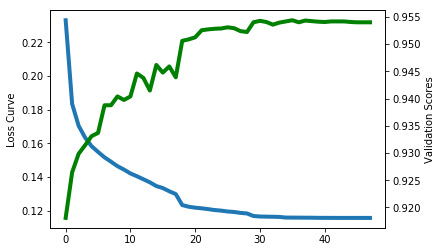

In [30]:
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots()
ax1.plot(clf.loss_curve_, linewidth=4)
#ax1.set_xlim([0, 60])
#ax1.set_ylim([0.04, 0.18])
ax1.set_ylabel('Loss Curve')

ax2 = ax1.twinx()
ax2.plot(clf.validation_scores_, linewidth=4, c='g')
#ax2.set_ylim([0.65, 0.75])
ax2.set_ylabel('Validation Scores')

In [31]:
X_train = pcadataset.final[pcadataset.final['Slices'].isin(['1', '3'])].values[:, -ncomp:] 
X_test = pcadataset.final[pcadataset.final['Slices']=='2'].values[:, -ncomp:]
y_train = pcadataset.final[pcadataset.final['Slices'].isin(['1', '3'])][featofvar].replace(['1K', '5K'], 'MID').values
y_test = pcadataset.final[pcadataset.final['Slices']=='2'][featofvar].replace(['1K', '5K'], 'MID').values

for run in range(1):
    #X_train, X_test, y_train, y_test = train_test_split(test, y, test_size=0.4)

    clf = MLPClassifier(hidden_layer_sizes=(900, ), solver='sgd', verbose=True, max_iter=300, tol=0.00001,
                        alpha=0.001, batch_size=100, learning_rate_init=0.005, learning_rate='adaptive',
                        early_stopping=True, validation_fraction=0.1)

    clf.fit(X_train, y_train)
    
    print('Training Results')
    y_true1, y_pred1 = y_train, clf.predict(X_train)
    print(classification_report(y_true1, y_pred1, digits=4))
    
    print('Test Results')
    print()
    y_true, y_pred = y_test, clf.predict(X_test)
    print(classification_report(y_true, y_pred, digits=4))

Iteration 1, loss = 0.23008825
Validation score: 0.907268
Iteration 2, loss = 0.19715399
Validation score: 0.908241
Iteration 3, loss = 0.19002165
Validation score: 0.908998
Iteration 4, loss = 0.18536089
Validation score: 0.911591
Iteration 5, loss = 0.18146011
Validation score: 0.914239
Iteration 6, loss = 0.17820713
Validation score: 0.912132
Iteration 7, loss = 0.17523376
Validation score: 0.914888
Iteration 8, loss = 0.17274548
Validation score: 0.915644
Iteration 9, loss = 0.17039610
Validation score: 0.915050
Iteration 10, loss = 0.16783102
Validation score: 0.919535
Iteration 11, loss = 0.16549746
Validation score: 0.920292
Iteration 12, loss = 0.16357235
Validation score: 0.923210
Iteration 13, loss = 0.16142061
Validation score: 0.922886
Iteration 14, loss = 0.15917245
Validation score: 0.922616
Iteration 15, loss = 0.15694512
Validation score: 0.924507
Iteration 16, loss = 0.15485230
Validation score: 0.924777
Iteration 17, loss = 0.15305720
Validation score: 0.927587
Iterat

In [ ]:
fig, ax1 = plt.subplots()
ax1.plot(clf.loss_curve_, linewidth=4)
#ax1.set_xlim([0, 60])
#ax1.set_ylim([0.04, 0.18])
ax1.set_ylabel('Loss Curve')

ax2 = ax1.twinx()
ax2.plot(clf.validation_scores_, linewidth=4, c='g')
#ax2.set_ylim([0.65, 0.75])
ax2.set_ylabel('Validation Scores')

In [ ]:
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots()
ax1.plot(clf.loss_curve_, linewidth=4)
#ax1.set_xlim([0, 60])
#ax1.set_ylim([0.04, 0.18])
ax1.set_ylabel('Loss Curve')

ax2 = ax1.twinx()
ax2.plot(clf.validation_scores_, linewidth=4, c='g')
#ax2.set_ylim([0.65, 0.75])
ax2.set_ylabel('Validation Scores')

In [ ]:
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots()
ax1.plot(clf.loss_curve_, linewidth=4)
#ax1.set_xlim([0, 60])
#ax1.set_ylim([0.04, 0.18])
ax1.set_ylabel('Loss Curve')

ax2 = ax1.twinx()
ax2.plot(clf.validation_scores_, linewidth=4, c='g')
ax2.set_ylim([0.65, 0.75])
ax2.set_ylabel('Validation Scores')

In [ ]:
ncomp = 16
featofvar = 'Region'
test = pcadataset.final[pcadataset.final['Particle Type'] == 'PEG'].values[:, -ncomp:]
y = pcadataset.final[pcadataset.final['Particle Type'] == 'PEG'][featofvar].values
for run in range(1):
    X_train, X_test, y_train, y_test = train_test_split(test, y, test_size=0.4)

    clf = MLPClassifier(hidden_layer_sizes=(600, ), solver='sgd', verbose=True, max_iter=500, tol=0.00001,
                        alpha=0.001, batch_size=50, learning_rate_init=0.005, learning_rate='adaptive',
                        early_stopping=True, validation_fraction=0.1)

    clf.fit(X_train, y_train)
    
    print('Training Results')
    y_true1, y_pred1 = y_train, clf.predict(X_train)
    print(classification_report(y_true1, y_pred1, digits=4))
    
    print('Test Results')
    print()
    y_true, y_pred = y_test, clf.predict(X_test)
    print(classification_report(y_true, y_pred, digits=4))

In [ ]:
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots()
ax1.plot(clf.loss_curve_, linewidth=4)
#ax1.set_xlim([0, 60])
#ax1.set_ylim([0.04, 0.18])
ax1.set_ylabel('Loss Curve')

ax2 = ax1.twinx()
ax2.plot(clf.validation_scores_, linewidth=4, c='g')
#ax2.set_ylim([0.65, 0.75])
ax2.set_ylabel('Validation Scores')

In [ ]:
ncomp = 16
featofvar = 'Region'
test = pcadataset.final[pcadataset.final['Particle Type'] == 'PS'].values[:, -ncomp:]
y = pcadataset.final[pcadataset.final['Particle Type'] == 'PS'][featofvar].values
for run in range(1):
    X_train, X_test, y_train, y_test = train_test_split(test, y, test_size=0.4)

    clf = MLPClassifier(hidden_layer_sizes=(600, ), solver='sgd', verbose=True, max_iter=500, tol=0.00001,
                        alpha=0.001, batch_size=50, learning_rate_init=0.005, learning_rate='adaptive',
                        early_stopping=True, validation_fraction=0.1)

    clf.fit(X_train, y_train)
    
    print('Training Results')
    y_true1, y_pred1 = y_train, clf.predict(X_train)
    print(classification_report(y_true1, y_pred1, digits=4))
    
    print('Test Results')
    print()
    y_true, y_pred = y_test, clf.predict(X_test)
    print(classification_report(y_true, y_pred, digits=4))

In [ ]:
fig, ax1 = plt.subplots()
ax1.plot(clf.loss_curve_, linewidth=4)
#ax1.set_xlim([0, 60])
#ax1.set_ylim([0.04, 0.18])
ax1.set_ylabel('Loss Curve')

ax2 = ax1.twinx()
ax2.plot(clf.validation_scores_, linewidth=4, c='g')
#ax2.set_ylim([0.65, 0.75])
ax2.set_ylabel('Validation Scores')

In [ ]:
pcadataset.final.hist(column=0, by='Region and Type', sharex=True, bins=np.linspace(-12, 12, 100),
                figsize=(9, 7), grid=False, layout=(6,1), sharey=True, )

In [ ]:
y_true2 = fstats_tot['Region and Type'].values
labels3 = ['PEG_Cortex', 'PEG_']

size3 = np.random.rand(len(y_true2))
y_pred2 = list(pd.cut(size3, bins=[0, 0.1667, 0.3333, 0.5, 0.66667, 0.83333, 10], labels=mws).astype(str))
print(classification_report(y_true2, y_pred2, digits=4))

In [ ]:
0.75/0.16667